**EXPLORING DATA**

In [10]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/sample_data/mcdonalds.csv')

# Initial inspection: first few rows
print(data.head())

# Check for variable types and structure
print(data.info())

# Summary statistics for numeric columns
print(data.describe())

# Check the unique values in categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(f"{column}: {data[column].unique()}")


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   y

**DATA CLEANING**

In [11]:
# Display unique values for categorical columns
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")

# Standardize labels (example: standardizing 'Gender' values)
data['Gender'] = data['Gender'].str.strip().str.capitalize()


yummy: ['No' 'Yes']
convenient: ['Yes' 'No']
spicy: ['No' 'Yes']
fattening: ['Yes' 'No']
greasy: ['No' 'Yes']
fast: ['Yes' 'No']
cheap: ['Yes' 'No']
tasty: ['No' 'Yes']
expensive: ['Yes' 'No']
healthy: ['No' 'Yes']
disgusting: ['No' 'Yes']
Like: ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
VisitFrequency: ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender: ['Female' 'Male']


In [12]:
# Replace implausible values (if found)
# Example: Replace missing/invalid 'Age' values with median
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Convert non-numeric to NaN
data['Age'].fillna(data['Age'].median(), inplace=True)


<ipython-input-12-34b1bf305643>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


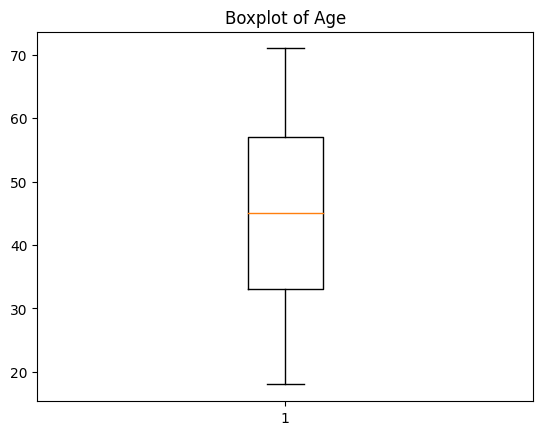

In [13]:
# Check for missing values and handle them
print(data.isnull().sum())
data = data.dropna()  # Drop rows with NaN, or you can impute them

# Identify outliers using boxplots
import matplotlib.pyplot as plt

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    plt.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


** Descriptive Analysis**

In [14]:
# Generate summary statistics for numeric columns
print(data.describe())


               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


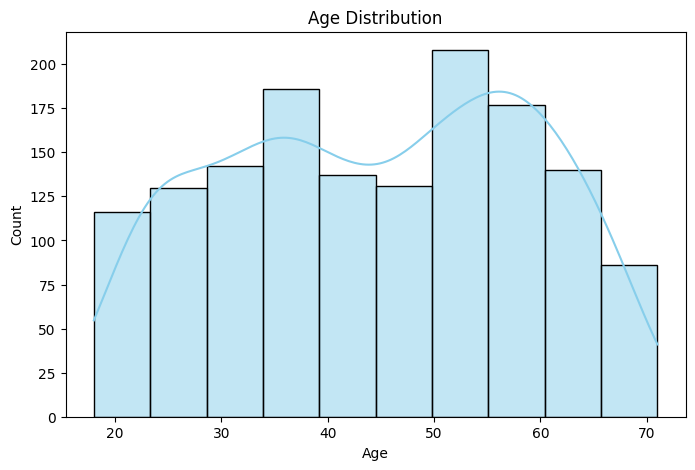

In [16]:
import seaborn as sns

# Histogram for Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()



**PRE PROCESSING**

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (e.g., 'Gender')
encoder = LabelEncoder()
data['Gender_Encoded'] = encoder.fit_transform(data['Gender'])

print(data[['Gender', 'Gender_Encoded']].head())


   Gender  Gender_Encoded
0  Female               0
1  Female               0
2  Female               0
3  Female               0
4    Male               1


nemerical values

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric columns
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaled_data = scaler.fit_transform(data[numeric_columns])

# Create DataFrame of scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)
print(scaled_df.head())


        Age  Gender_Encoded
0  1.153258       -0.918645
1  0.449839       -0.918645
2  1.223600       -0.918645
3  1.715993       -0.918645
4  0.309156        1.088560


**PCA**

In [19]:
# Ensure no NaN values exist in the scaled data
print(scaled_df.isnull().sum().sum())  # Should be 0


0


In [20]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Create DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Display the first few rows of PCA results
print(pca_df.head())


        PC1       PC2
0  1.465057  0.165897
1  0.967665 -0.331496
2  1.514796  0.215636
3  1.862970  0.563810
4 -0.551122  0.988334


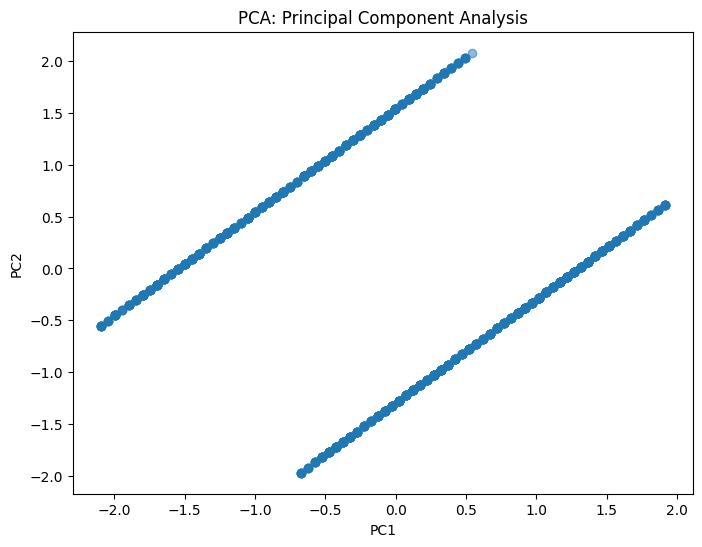

Explained variance ratio: [0.50992586 0.49007414]


In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA: Principal Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Print the explained variance ratio to see how much variance is captured
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
